# Introduction

## Examples of Supervised Machine Learning models for classification and regression

There are many machine learning algorithms!
Most of them can be found in the scikit-learn Python library:

1. <a style="text-decoration:none" href=https://scikit-learn.org/stable/modules/naive_bayes.html>Naive Bayes</a>
2. <a style="text-decoration:none" href=https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html >k Nearest Neighbors</a>
3. <a style="text-decoration:none" href=https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>Decision Tree</a>
4. <a style="text-decoration:none" href=https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>Random Forest</a>
5. <a style="text-decoration:none" href=https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html >Support Vector Machines</a> 
6. <a style="text-decoration:none" href=https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html>Gradient Boosting</a>

<b>Scikit-learn</b> is an amazing, free software machine learning library used in python. It works very well with the <b>NumPy</b> library for high-performance linear algebra and matrix operations, <b>Matplotlib</b> for plotting purposes and with <b>Pandas</b> dataframes.

#### Authors:
      • Yannis Mageiras
      • Marina Koukouvaou

#### Date:
      • 28/11/2022 (latest update)

In [77]:
## Importing the libraries: pandas, matplotlib, numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing the ML algorithms from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

## An example of a simple classification using the DecisionTree Classifier on the make_moons dataset

The make_moons toy dataset generates two interleaving half moons, where one can choose the number of samples and the mixture between the two classes or the standard deviation of the Gaussian noise added to the data.

The dataset moons have two features that the model can be trained on (the x_1 and x_2). These two features can be seen below by scatter plotting the data using matplotlib.

In [4]:
## importing the necessary libraries for the make moons data, plotting and visualizing the decision tree and the accuracy metric
from sklearn.datasets import make_moons
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [13]:
x_moons, y_moons = make_moons(n_samples=10000, noise=0.1, random_state=42) ## Initializing the dataset make moons
x_moons = pd.DataFrame(x_moons, columns=["feature1","feature2"]) ## transforming the X feature data into a pandas dataframe
x_moons  ## showing the results

,feature1,feature2
0,0.455493,-0.125503
1,-0.704217,0.041308
2,0.413799,0.791322
3,-0.864049,0.138754
4,-0.936268,0.359267
...,...,...
9995,0.179911,0.138552
9996,0.052471,0.474023
9997,-0.038031,0.245408
9998,0.869802,0.523295


In [22]:
## We transform the y class values (0 or 1) to a dataframe.
y_moons = pd.DataFrame(y_moons, columns=["truth"])
y_moons

,truth
0,1
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,0


## Training the Desicion Tree model on these make moons data

In [60]:
from datetime import datetime as dt

## first we initialize the algorithm that we will use. The parameters inside the parentheses are called hyperparameters
## and are the ones that define the characteristics of the training. We will discuss about these later.

model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                               max_features=None, random_state=None, max_leaf_nodes=None)

## Training the model on the x and y values
start = dt.now()
model.fit(x_moons, y_moons)
running_secs = (dt.now() - start).seconds
## Make predictions on the training data. NOTE!! normally we have to keep aside a part of the dataset and make the predictions 
## on these unseen points. Now just to see how the process goes we will make the predictions on the training data
ypred= model.predict(x_moons)
print(f"The model is trained in running time = {running_secs:.2f} seconds and with an accuracy of {accuracy_score(ypred,y_moons)*100}")

The model is trained in running time = 0.00 seconds and with an accuracy of 99.99


## Visual investigation of the data and the training results

In [5]:
def plot(ax,n,title):
    x_moons, y_moons = make_moons(n_samples=10000, noise=n, random_state=42)
    ax.scatter(x_moons[:,0],x_moons[:,1])
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)

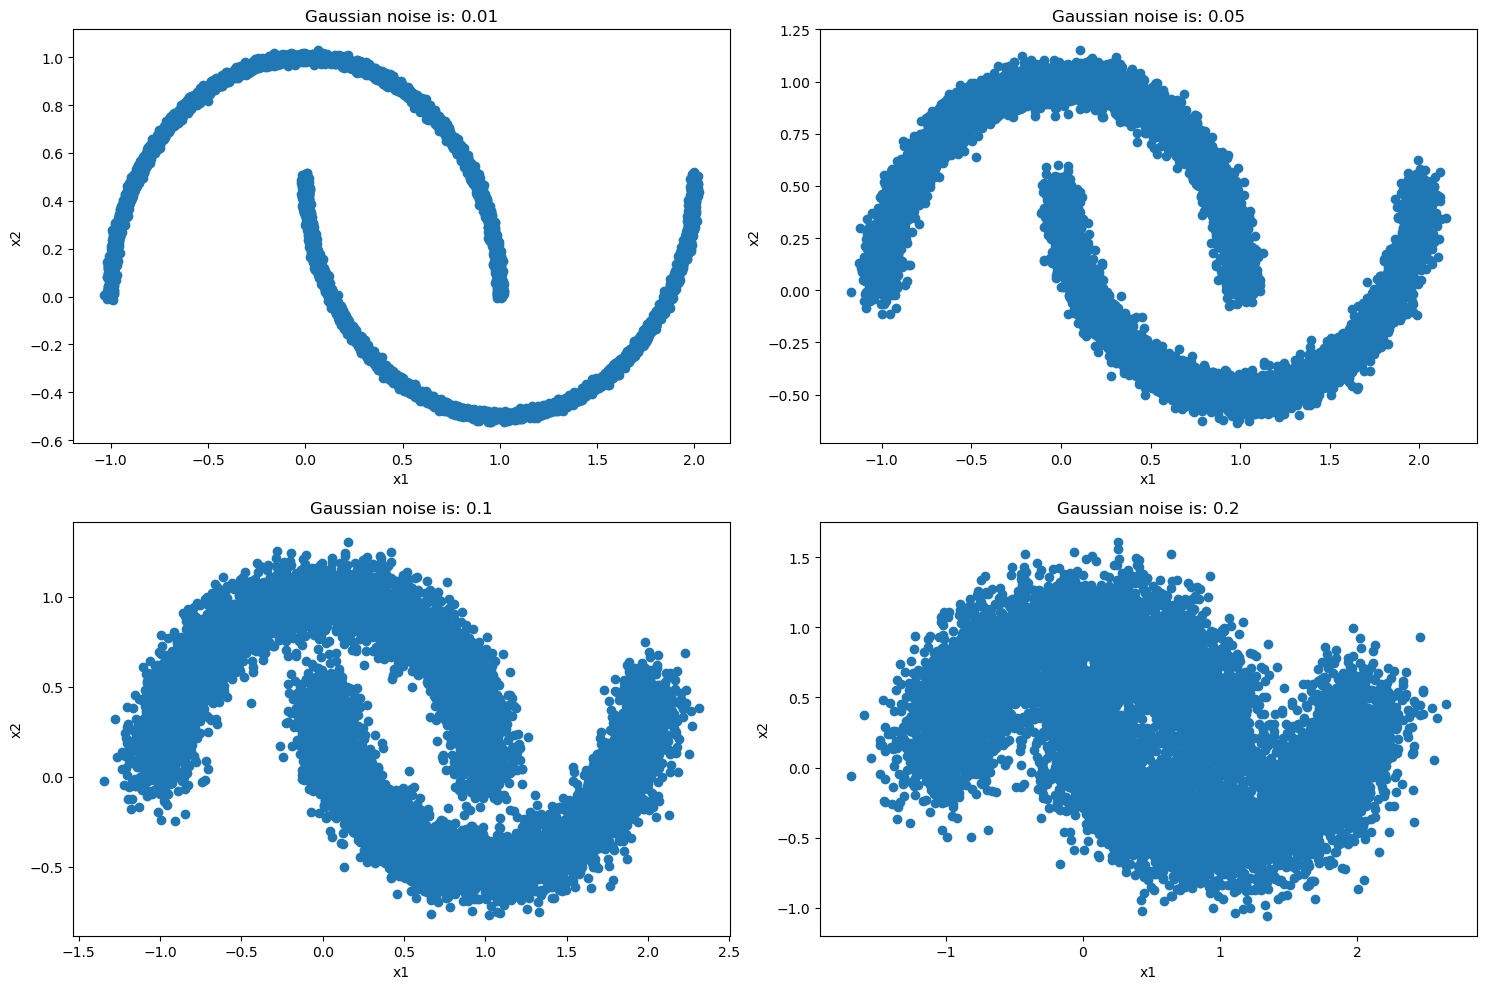

In [6]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

plot(ax1,0.01,"Gaussian noise is: 0.01")
plot(ax2,0.05,"Gaussian noise is: 0.05")
plot(ax3,0.1,"Gaussian noise is: 0.1")
plot(ax4,0.2,"Gaussian noise is: 0.2")
plt.tight_layout()

### Here we use a function in which we initialize the make_moons dataset with different noise values, we train the decision tree classifier for different max_depths, find the accuracy on the training data and plot the results

In [378]:
def decision_tree_training_and_results(ax, n, max_depth,feature1,feature2):
    # Creating the moons dataset with 10000 samples and various noise values
    x_moons, y_moons = make_moons(n_samples=10000, noise=n, random_state=42)
    # creating the X: features of the dataset into a pandas DataFrame
    X = pd.DataFrame(x_moons, columns=['x1', 'x2'])
    # creating the dataframe with the truth values (0 or 1) for each of the classes
    y = pd.Series(y_moons, name='class')
    
    # initializing the decisionTreeclassifier with the max_depth hyperparameter being a variable that we can control
    # by calling the function
    clf = DecisionTreeClassifier(max_depth=max_depth)
    ## fitting the model on the x_moons and y_moons values
    clf.fit(X, y)
    print("------The model is trained------")
    
    ## Creating a meshgrid list that will be used for the contour plot. This contour plot will show all the areas on the 2D plot
    ## where the trained model predicts as the first (0) or the second class (1) of the make moons dataset.
    xx, yy = np.meshgrid(np.linspace(X[feature1].min(), X[feature1].max(), 300), 
                         np.linspace(X[feature2].min(), X[feature2].max(), 300))
    X_bkg = np.c_[xx.ravel(), yy.ravel()]
    y_bkg = clf.predict(X_bkg).reshape(xx.shape)
    
    ## Make predictions on the X values that the model trained on
    y_pred = clf.predict(X.values)
    
    # plot the classification results
    ax.contourf(xx, yy, y_bkg, cmap='ocean', alpha=0.5) # coloured by class
    
    ax.scatter(X[feature1][y_pred!=y.values], X[feature2][y_pred!=y.values], s=100, c='red') # plotting with red color the misclassified points
    ax.scatter(X[feature1][y.values==0], X[feature2][y.values==0], s=20, c='g')
    ax.scatter(X[feature1][y.values==1], X[feature2][y.values==1], s=20, c='b')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.tight_layout()
    
    ## Printing the accuracy score of the trained model on the training data
    print(f"Train accuracy for make moons noise={n} and tree max depth={max_depth}: {accuracy_score(y_pred, y.values)*100.0:.2f}%")

### Apply the function for different data noise and max_depth

------The model is trained------
Train accuracy for make moons noise=0.1 and tree max depth=1: 84.17%
------The model is trained------
Train accuracy for make moons noise=0.1 and tree max depth=2: 92.05%
------The model is trained------
Train accuracy for make moons noise=0.1 and tree max depth=7: 99.85%
------The model is trained------
Train accuracy for make moons noise=0.1 and tree max depth=10: 99.99%


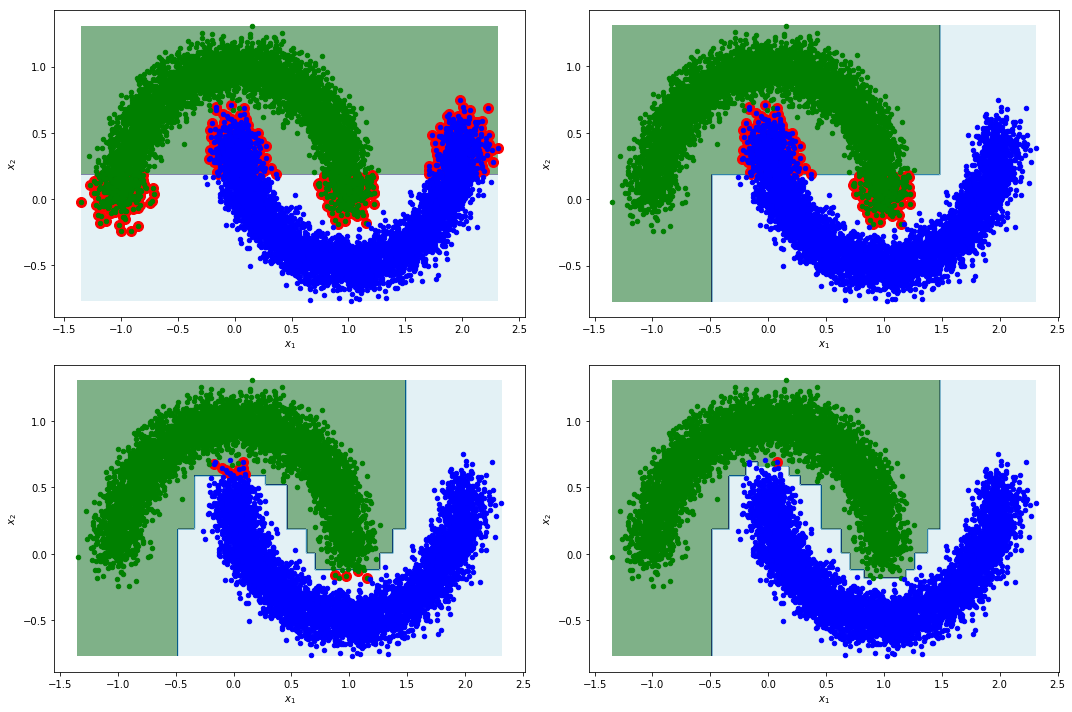

In [379]:
## initializing the subplots to be presented
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
plt.rcParams.update({'figure.figsize':(15,10)})

## Making the training 5
decision_tree_training_and_results(ax1,0.1,1,"x1","x2")
decision_tree_training_and_results(ax2,0.1,2,"x1","x2")
decision_tree_training_and_results(ax3,0.1,7,"x1","x2")
decision_tree_training_and_results(ax4,0.1,10,"x1","x2")

------The model is trained------
Train accuracy for make moons noise=0.01 and tree max depth=5: 99.92%
------The model is trained------
Train accuracy for make moons noise=0.05 and tree max depth=5: 99.72%
------The model is trained------
Train accuracy for make moons noise=0.1 and tree max depth=5: 98.99%
------The model is trained------
Train accuracy for make moons noise=0.2 and tree max depth=5: 96.95%


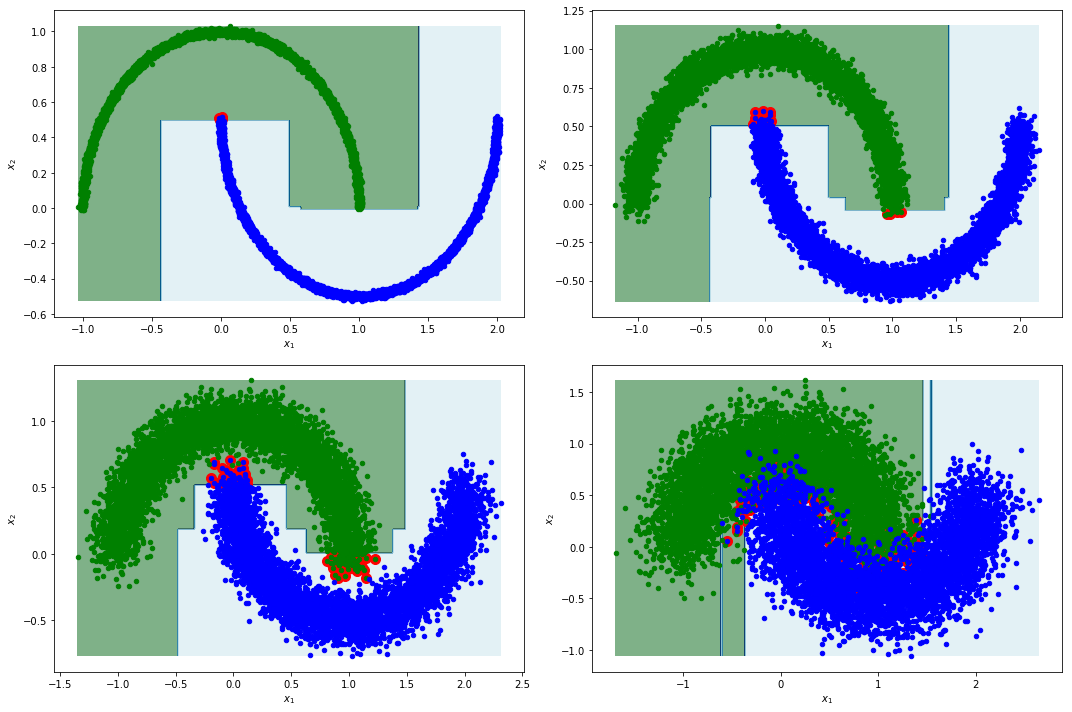

In [380]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
plt.rcParams.update({'figure.figsize':(15,10)})
decision_tree_training_and_results(ax1,0.01,5,"x1","x2")
decision_tree_training_and_results(ax2,0.05,5,"x1","x2")
decision_tree_training_and_results(ax3,0.1,5,"x1","x2")
decision_tree_training_and_results(ax4,0.2,5,"x1","x2")

## Iris dataset classification using the XGBoost classifier

  The iris flower dataset is a multivariate dataset that uses four features (X features: <b>sepal length, sepal width, petal length, petal width</b>) to discriminate between three species of the iris flower (y targets: <b> Iris setosa, iris virginica, iris versicolor</b>). The dataset consists of 50 samples for each class.

<img src="../../iris-machinelearning.png">

In [62]:
from sklearn.datasets import load_iris
iris = load_iris()

The dataset, as can be seen below, is like a dictionary (this sklearn dictionary type is called Bunch. The bunch format extends dictionaries by enabling values to be accessed not only by key - ex. iris["target_names"] - but also by attribute - ex. iris.target_names)

In [63]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## We can access all the available information by calling the iris dataset with the desired attribute as extention.
#### iris.data
#### iris.target_names
#### iris.DESCR
#### iris.feature_names
#### iris.filename
#### iris.data_module

#### Here we make a pandas dataframe with the iris.data and the iris.feature_names as columns

In [64]:
df_xvalues = pd.DataFrame(data=iris.data , columns=iris.feature_names)

In [65]:
df_xvalues

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### So now we have all the available 150 observations (50 for each class) with a nice DataFrame format with column names describing each feature

 ###  Followingly, we make a list of the class names and make a DataFrame with the truth values.

In [66]:
target_names=list(iris.target_names)
target_names

['setosa', 'versicolor', 'virginica']

In [67]:
df_truth = pd.DataFrame(data=iris.target,columns=["truth"])   #### Make a dataframe of the true class value for each observation
#df_truth = df_truth["truth"].apply(lambda x:target_names[x])  ### This line of code transforms the 0,1,2 indicator of each class to the real name of each class

#### We can combine the X data values of the flower observations and the y true class values into one dataframe by using the pandas.concat command

In [69]:
df_iris= pd.concat([df_xvalues,df_truth],axis=1)

In [70]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),truth
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### We are naming the X values and y values that will be the inputs of the machine learning model as X_iris and y_iris respectively

In [73]:
X_iris = df_xvalues

y_iris =df_truth


In [74]:
X_iris.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

## Training the XGBoost Classifier

In [80]:
clf = xgb.XGBClassifier(objective='multi:softmax',num_class=3, learning_rate=0.1,
                            max_depth=5, eval_metric='mlogloss', n_estimators=300,
                            seed=42, use_label_encoder=False)
start = dt.now()
clf.fit(X_iris, y_iris)
running_secs = (dt.now() - start).seconds
ypred_xgboost = clf.predict(X_iris)   ## Making predictions on the training data


print(f"----The model is trained in running time = {running_secs:.2f} seconds and with an accuracy of {accuracy_score(ypred_xgboost,y_iris)*100}")

----The model is trained in running time = 0.00 seconds and with an accuracy of 100.0


## Visualizing the results

In [81]:
import xgboost as xgb
def Iris_decision_tree_training_and_results(X,y,ax, max_depth,feature1,feature2):
    features= X_iris.columns.values
    ## initializing the decisionTreeclassifier with the max_depth hyperparameter being a variable that we can control
    ## by calling the function
    half=len(features)/2
    half=int(half)
    #clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = xgb.XGBClassifier(objective='multi:softmax',num_class=3, learning_rate=0.1,
                            max_depth=max_depth, eval_metric='mlogloss', n_estimators=300,
                            seed=42, use_label_encoder=False)
    if len(features) % 2 ==0:   
        iterate_list=np.arange(0,len(features)).reshape(half,2)
    else:
        iterate_list=np.arange(0,len(features)-1).reshape(half,2)
    ## fitting the model on the X and y values
    clf.fit(X, y)
    X_bkg_list=[]
    xx1, yy1 = np.meshgrid(np.linspace(X[feature1].min(), X[feature1].max(), 300), 
                         np.linspace(X[feature2].min(), X[feature2].max(), 300))
    for i,j in iterate_list:
        xx, yy = np.meshgrid(np.linspace(X[features[i]].min(), X[features[i]].max(), 300), 
                         np.linspace(X[features[j]].min(), X[features[j]].max(), 300))
        #X_bkg = np.c_[xx.ravel(), yy.ravel()]
        X_bkg_list.append(xx.ravel())
        X_bkg_list.append(yy.ravel())
    X_bkg = np.array(np.c_[X_bkg_list[0],X_bkg_list[1],X_bkg_list[2],X_bkg_list[3]])
    #X_bkg_conc = np.concatenate([X_bkg_array[0],X_bkg_array[1],X_bkg_array[2],X_bkg_array[3]], axis=1)
    y_bkg = clf.predict(X_bkg).reshape(xx1.shape)
    
    ## Make predictions on the X values that the model trained on
    y_pred = clf.predict(X)
    # plot the classification results
    ax.contourf(xx1, yy1, y_bkg, cmap='plasma', alpha=0.5) # coloured by class
    ax.scatter(xx1[y_bkg==0], yy1[y_bkg==0], s=10,c = "b", marker="*") # coloured by class
    ax.scatter(xx1[y_bkg==1], yy1[y_bkg==1], s=10,c = "g", marker="*") # coloured by class
    ax.scatter(xx1[y_bkg==2], yy1[y_bkg==2], s=10,c = "r", marker="*") # coloured by class
    ax.scatter(X[feature1][y_pred!=y["truth"]], X[feature2][y_pred!=y["truth"]], s=100, c='black')
    ax.scatter(X[feature1][y["truth"]==0], X[feature2][y["truth"]==0], s=30, facecolor='b',edgecolor="black")
    ax.scatter(X[feature1][y["truth"]==1], X[feature2][y["truth"]==1], s=30, facecolor='g',edgecolor="black")
    ax.scatter(X[feature1][y["truth"]==2], X[feature2][y["truth"]==2], s=30, facecolor='r',edgecolor="black")

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.tight_layout()
    
    # Printing the accuracy score of the trained model on the training data
    print(f"Train accuracy: {accuracy_score(y_pred, y.values)*100.0:.2f}%")

Train accuracy: 100.00%


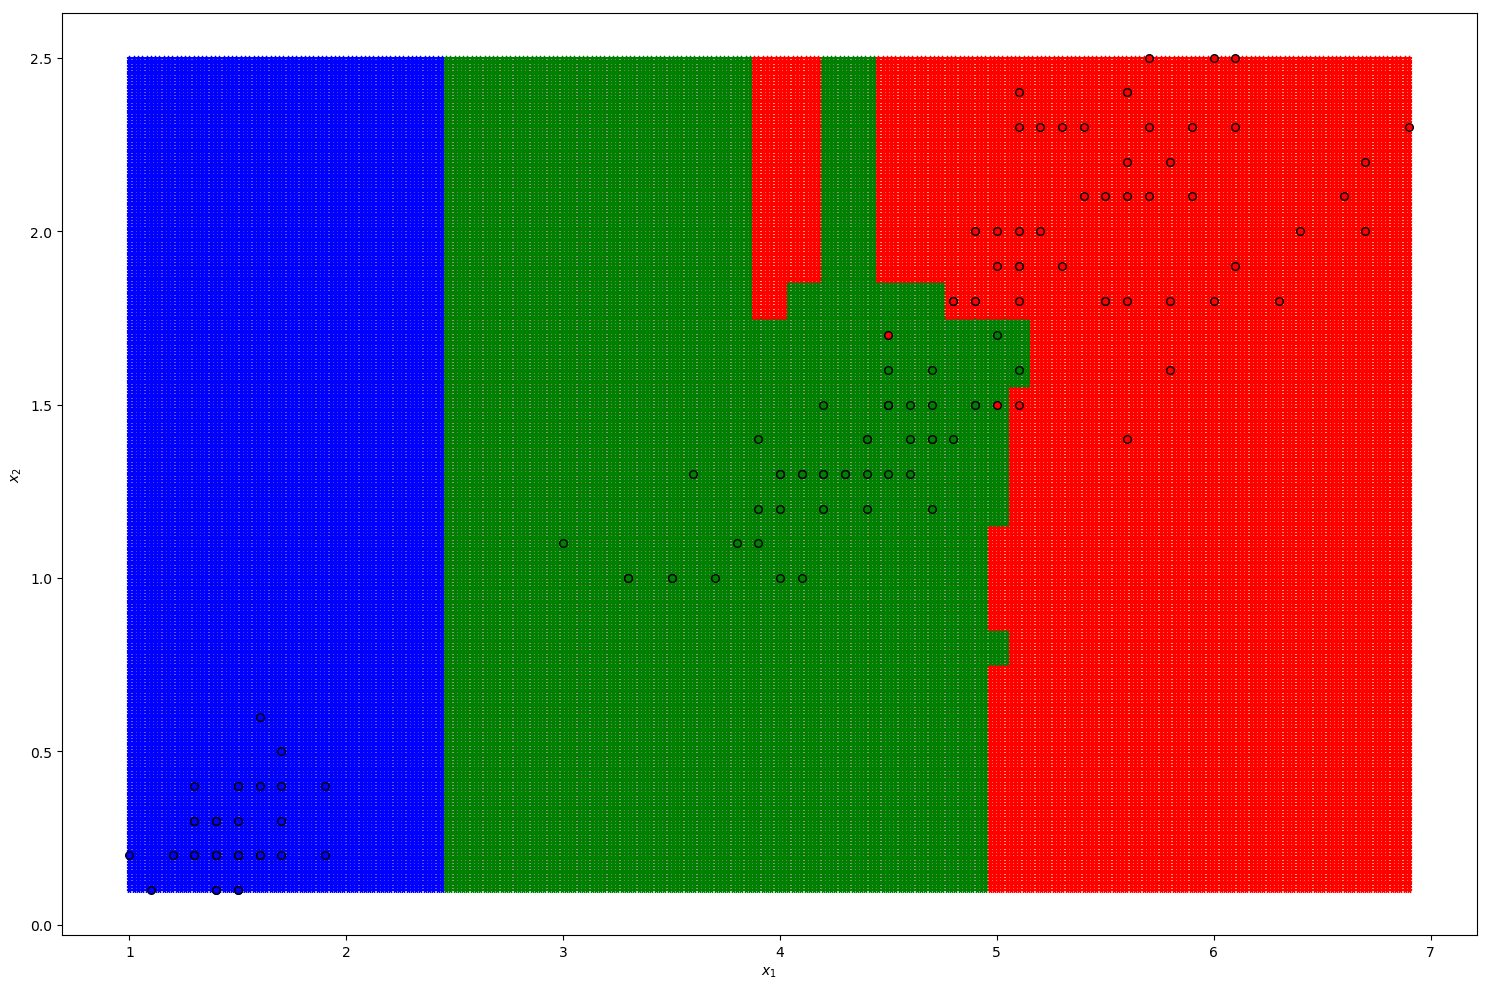

In [82]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
plt.rcParams.update({'figure.figsize':(15,10)})

Iris_decision_tree_training_and_results(X_iris,y_iris,ax1,2,"petal length (cm)","petal width (cm)")

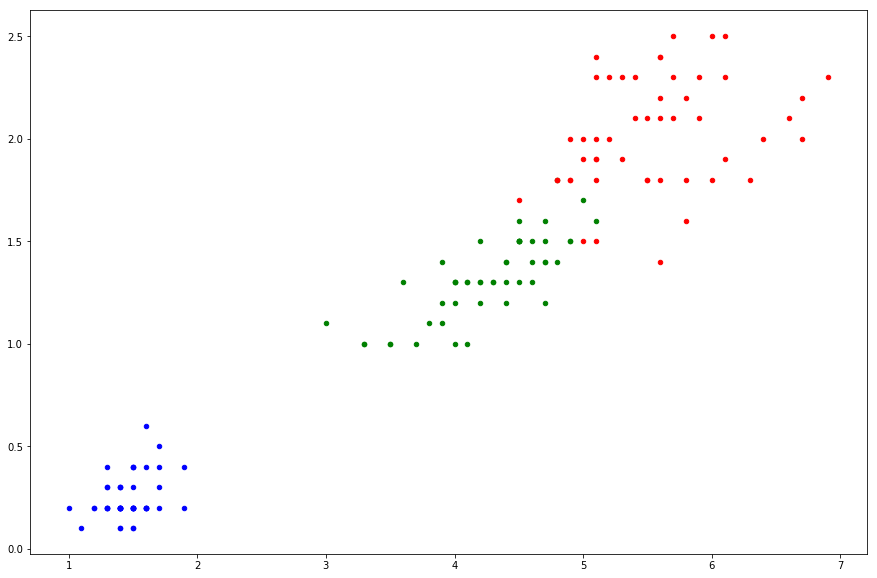

In [290]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.rcParams.update({'figure.figsize':(15,10)})
ax.scatter(X_iris["petal length (cm)"][y_iris["truth"]==0], X_iris["petal width (cm)"][y_iris["truth"]==0], s=20, c='b')
ax.scatter(X_iris["petal length (cm)"][y_iris["truth"]==1], X_iris["petal width (cm)"][y_iris["truth"]==1], s=20, c='g')
ax.scatter(X_iris["petal length (cm)"][y_iris["truth"]==2], X_iris["petal width (cm)"][y_iris["truth"]==2], s=20, c='r')